# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Import useful libs and utilities
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import numpy as np
import cv2
import math
import random
import pickle
import pandas
import os
from scipy import ndimage
from numpy import newaxis
%matplotlib inline

/Users/hanzhijun/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load raw images and pickle to dictionary

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

#### Basic summary of the data set

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of a traffic sign image
image_shape = X_train.shape

# Unique classes/labels there are in the dataset
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


* The size of training set is 34799
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Include an exploratory visualization of the dataset

[[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']
 [23 'Slippery road']
 [24 'Road narrows on the right']
 [25 'Road work']
 [26 'Traffic signals']
 [27 'Pedestrians']
 [28 'Children crossing']
 [29 'Bicycles crossing']
 [30 'Beware of ice/snow']
 [31 'Wild animals crossing']
 [32 'End of all speed and passing limits']
 [33 'Turn right ahead']
 [34 'Turn left ahead']
 [35 'Ahead only']
 [36 'Go st

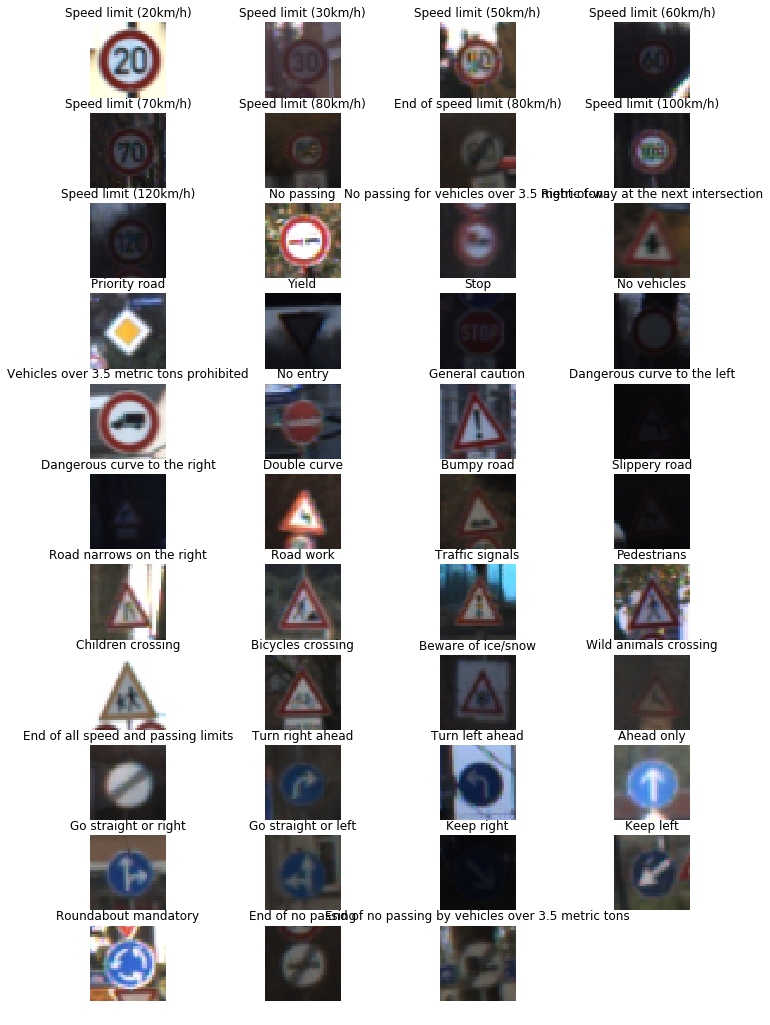

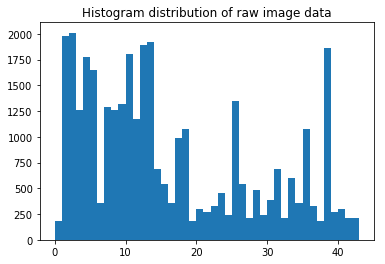

In [4]:
# Import sign names dataset
sign_names = pandas.read_csv('signnames.csv').values
print(sign_names)

# Display random raw images
plt.figure(figsize=(12, 18))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_disp = X_train[i == y_train]
    plt.imshow(x_disp[4, :, :, :])
    disp_name = np.array(sign_names[i][1])
    #print(disp_name)
    plt.title(disp_name)
    plt.axis('off')
plt.show()

# Histogram distribution display
plt.hist(y_train, bins = range(int(n_classes)+1))
plt.title('Histogram distribution of raw image data')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, globalhistogram equalization)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here

# Image RGB scale to gray
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #return np.resize(img[:,:,0], (32, 32, 1))
    return img
    
def normalize(images):
    return (images - 128) / 128

# Apply Contrast limited adaptive histogram equalization
def hist_equalize(images):
    #clahe = cv2.createCLAHE()    
    #return clahe.apply(img)
    #return cv2.equalizeHist(img)
    #return img
    img = []
    for i in images:
        i = cv2.equalizeHist(i)
        img.append(i)
        return np.array(img)
    
def pre_process(images):
    img = []
    for i in images:
        i = grayscale(i)
        i = normalize(i)
        img.append(i)
    return np.array(img)

X_train = pre_process(X_train)
X_train = X_train[..., newaxis]

X_test = pre_process(X_test)
X_test = X_test[..., newaxis]


#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

1. OpenCV grayscaling image processing technique is firstly used to process images. The reason is that the luminance is very important in distinguishing visual features, and so is it for neural network model to identify and extract factors from variant layers.
2. Second image processing is the normalization. Image normalization is a process that re-scale the range of pixel intensity values, normalization turns out to be good for images that have poor contrast due to glare.

In [6]:
def generate_pics(pics, X_train, pic_picked, pics_per_class, angle, more_train_pics, more_labels):
    for num in range(pics):
        pic = X_train[pic_picked][random.randint(0, pics_per_class[i] - 1)]
        p = ndimage.rotate(pic, angle, reshape=False)
        more_train_pics.append(p)
        more_labels.append(i)
    return np.array(more_train_pics), np.array(more_labels)

pics_per_class = np.bincount(y_train)
pics_needed = int(np.mean(pics_per_class))

for i in range(len(pics_per_class)):
    # Picking up the angles for picture rotation
    angle = int(random.uniform(-20,20))
    
    if pics_per_class[i] < pics_needed:
        
        pics = pics_needed - pics_per_class[i]
        pic_picked = np.where(y_train == i)
        more_train_pics = []
        more_labels = []
        # Iterate each picture class to generate more pictures
        more_train_pics, more_labels = generate_pics(pics, X_train, pic_picked, pics_per_class, angle, more_train_pics, more_labels)

        X_train = np.append(X_train, more_train_pics, axis=0)
        y_train = np.append(y_train, more_labels, axis=0)


In [7]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def fullconnect(x, W, b):
    x = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(x)

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases
    mu = 0
    sigma = 0.1
    
    # Store all the weights and bias for convolutional and connection layers
    weights = {
        'conv1': tf.Variable(tf.truncated_normal(shape=[5,5,1,6], mean=mu, stddev=sigma)),
        'conv2': tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean=mu, stddev=sigma)),
        'fc_1': tf.Variable(tf.truncated_normal(shape=[400,200], mean=mu, stddev=sigma)),
        'fc_2': tf.Variable(tf.truncated_normal(shape=[200,100], mean=mu, stddev=sigma)),
        'fc_3': tf.Variable(tf.truncated_normal(shape=[100,43], mean=mu, stddev=sigma))
    }
    biases = {
        'conv1': tf.Variable(tf.zeros(6)),
        'conv2': tf.Variable(tf.zeros(16)),
        'fc_1': tf.Variable(tf.zeros(200)),
        'fc_2': tf.Variable(tf.zeros(100)),
        'fc_3': tf.Variable(tf.zeros(43))
    }
    # Layer 1
    conv1 = conv2d(x, weights['conv1'], biases['conv1'], strides=1)
    conv1 = maxpool2d(conv1, k=2)
    # Layer 2
    conv2 = conv2d(conv1, weights['conv2'], biases['conv2'], strides=1)
    conv2 = maxpool2d(conv2, k=2)
    # Flatten 
    fc_0 = flatten(conv2)
    # Layer 3
    fc_1 = fullconnect(fc_0, weights['fc_1'], biases['fc_1'])
    # Dropout
    fc_1 = tf.nn.dropout(fc_1, keep_prob)
    # Layer 4
    fc_2 = fullconnect(fc_1, weights['fc_2'], biases['fc_2'])
    # Dropout
    fc_2 = tf.nn.dropout(fc_2, keep_prob)
    # Layer 5
    logits = tf.add(tf.matmul(fc_2, weights['fc_3']), biases['fc_3'])
    return logits

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The overall CNN architecture is subject to LeNet as shown below, along with the dropout application prior to the last fully connected layer

<img src="lenet.png">
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6
    # Layer 1: Activation. ReLU
    # Layer 1: Pooling. Input = 28x28x6. Output = 14x14x6
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16
    # Layer 2: Activation. ReLU
    # Layer 2: Pooling. Input = 10x10x16. Output = 5x5x16
    # Flatten. Input = 5x5x16. Output = 400
    # Layer 3: Fully Connected. Input = 400. Output = 200
    # Layer 3: Activation. ReLU
    # Hidden_layer: Dropout
    # Layer 4: Fully Connected. Input = 200. Output = 100
    # Layer 4: Activation. ReLU
    # Hidden_layer: Dropout
    # Layer 5: Fully Connected (Logits). Input = 100. Output = 43

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
rate = 0.001
epochs = 25
batch_size = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
training_operation = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss_operation)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluation(X_valid, y_valid):
    num_examples = len(X_valid)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_valid[offset:end], y_valid[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
# Splitting the training dataset into training and validation sets
X_train, y_train = shuffle(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

save_file = 'train_model.ckpt'
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
        validation_accuracy = evaluation(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, save_file)
    print("Model trained and saved.")

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluation(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.807


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The AdamOptimizer optimization method from Tensrflow is used, that turns out to have a better performance than a regular Gradient Descent Optimizer. Variant batch sizes were adopted and tested, it turns out the a slight higher batch size is performing better than a smaller batch size. 25 epochs is adopted given the compromise between training time efficiency and performance gains, as training accuracy is showing that the accuracy is remaining at nearly ~96% when epochs are more than 20 times. Further epochs will not be too much beneficial but result in only marginal gains while continuing time consuming. Two hidden dropout layers were implemented into LeNet architecture, between these three fully connected layers.

As for the hyperparameters, a mean of 0 and a standard deviation of 0.1 were used. 

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

1. Original LeNet CNN architecture is used. 
2. Two dropout hidden layers are implemented between these 3 fully connected layers.
3. Fully connected layers output dimensions are modified as test goes.
4. Extra data were generated for better training purpose. This turns out to efficiently increase training performance.
5. Modified model hyperparameters and finally settled down with learning rate = 0.001, epochs = 25, and batch size = 128.
6. The final model performance with identifing the web collected German traffic sign is 0.6, which could be seen as a fine result.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

5 German traffic signs are:
1). Stop
2). Yield
3). Turn left ahead
4). Speed limit (60km:h)
5). Road work

The difficulty that the model would have to identy the signs may be due to the fairly low resolution.

The 'Speed limit 60km/h' sign will be giving model very hard time to identify, as the main features in this sign are blended together with offering very limited distinguishing features.

The 'Road work' sign could also be potentially hard to tell, as quite a few traffic signs are using the similar triangular shape.

### Load and Output the Images

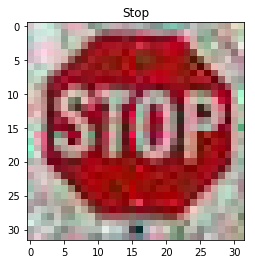

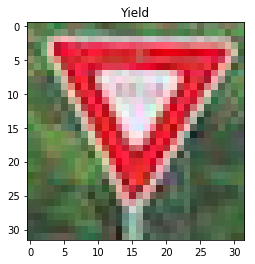

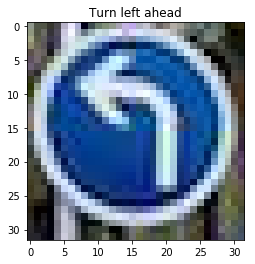

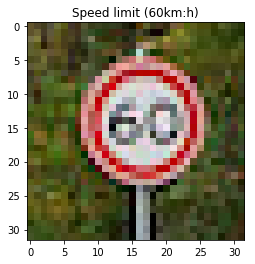

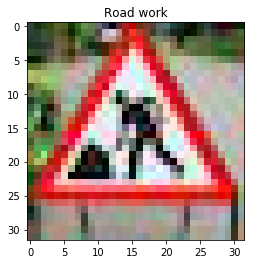

In [11]:
### Load the images and plot them here.
test_pics = os.listdir('test_pics/')
# Eliminate the '.DS_Store' file
test_pics.remove('.DS_Store')
test_pics_cnt = len(test_pics)

pics_to_be_tested = []
for i in test_pics:
    img = 'test_pics/' + i
    img = mpimg.imread(img)
    pics_to_be_tested.append(img)
    plt.imshow(img)
    
    filename, file_ext = os.path.splitext(i)
    plt.title(filename)
    plt.show()

In [12]:
# Convert list into numpy array
pics_to_be_tested = np.array(pics_to_be_tested)
pics_dim = list(pics_to_be_tested.shape)
# The dimension of pics to be tested are asserted to be 32x32x3
assert(pics_dim == [test_pics_cnt, 32, 32, 3])

# Pre-processing test pics
pics_to_be_tested = pre_process(pics_to_be_tested)
pics_to_be_tested = pics_to_be_tested[..., newaxis]
pics_dim = list(pics_to_be_tested.shape)
assert(pics_dim == [test_pics_cnt, 32, 32, 1])

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_pics_classes = sess.run(logits, feed_dict={x:pics_to_be_tested, keep_prob:1.0})
    sign_type_predict = sess.run(tf.nn.top_k(test_pics_classes, k=1, sorted=True))

len(sign_type_predict[0])
for i in range(0, len(sign_type_predict[0])):
    print('\n Test picture No.', i+1, '"s probabilities:', sign_type_predict[0][i])
    print(' Predicted classes:', sign_type_predict[1][i])
    predicted_sign_class = int(sign_type_predict[1][i])
    
    print('Predicted sign classes:', sign_names[predicted_sign_class][1])


 Test picture No. 1 "s probabilities: [ 6.4876647]
 Predicted classes: [14]
Predicted sign classes: Stop

 Test picture No. 2 "s probabilities: [ 22.17000008]
 Predicted classes: [13]
Predicted sign classes: Yield

 Test picture No. 3 "s probabilities: [ 19.58953285]
 Predicted classes: [34]
Predicted sign classes: Turn left ahead

 Test picture No. 4 "s probabilities: [ 6.57496357]
 Predicted classes: [2]
Predicted sign classes: Speed limit (50km/h)

 Test picture No. 5 "s probabilities: [ 5.07104731]
 Predicted classes: [28]
Predicted sign classes: Children crossing


#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Prediction results:
Test picture No. 1 "s probabilities: [ 16.20388603]
 Predicted classes: [14]

 Predicted sign classes: Stop

 Test picture No. 2 "s probabilities: [ 24.90747833]
 Predicted classes: [13]

 Predicted sign classes: Yield

 Test picture No. 3 "s probabilities: [ 22.03815651]
 Predicted classes: [34]

 Predicted sign classes: Turn left ahead

 Test picture No. 4 "s probabilities: [ 5.22190571]
 Predicted classes: [17]

 Predicted sign classes: No entry

 Test picture No. 5 "s probabilities: [ 7.30151749]
 Predicted classes: [28]

 Predicted sign classes: Children crossing
 
 My classifier ends up identifying 'Turn left ahead' 'Yield' 'Stop' signs out from 5 images, so ~60% test accuracy. This is lower than test accuracy tested from test images, which is ~80%.

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
# Make labels for the pictures to be tested
test_labels = np.array([14, 13, 34, 3, 25])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluation(pics_to_be_tested, test_labels)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))
    

Test Accuracy = 0.600


Test Accuracy = 0.600

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_pics_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:pics_to_be_tested, keep_prob:1.0})
    top_5 = sess.run(tf.nn.top_k(test_pics_prob, k=5))
    
for i in range(len(top_5[0][1])):
    print('\n Test picture "', i+1, '" probabilities:', top_5[0][i])
    print(' Predicted classes:', sign_type_predict[1][i])

[  9.47570562e-01   3.55547853e-02   1.35877877e-02   1.99505640e-03
   2.89978372e-04]


numpy.ndarray


 Test picture " 1 " probabilities: [  9.47570562e-01   3.55547853e-02   1.35877877e-02   1.99505640e-03
   2.89978372e-04]
 Predicted classes: [14]

 Test picture " 2 " probabilities: [  9.99996543e-01   1.95777443e-06   1.31577735e-06   1.12337268e-07
   5.18088470e-08]
 Predicted classes: [13]

 Test picture " 3 " probabilities: [  9.99983549e-01   1.64319281e-05   5.11021891e-10   4.24235841e-10
   1.54171148e-10]
 Predicted classes: [34]

 Test picture " 4 " probabilities: [ 0.90341556  0.07382529  0.00954085  0.00406596  0.00228985]
 Predicted classes: [2]

 Test picture " 5 " probabilities: [ 0.94346982  0.02756601  0.01149955  0.00608859  0.00473346]
 Predicted classes: [28]


#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

Top 5 softmax probabilities for the predictions on the German traffic sign images

Test picture No. 1 "s probabilities: [ 16.20388603   5.50467491   4.85756922   3.10744166   1.64605141]
 Predicted classes: [14 34 13  2 33]

 Test picture No. 2 "s probabilities: [ 24.90747833   7.10098028   6.37168312   3.7820673    1.21627367]
 Predicted classes: [13 12 33 15 38]

 Test picture No. 3 "s probabilities: [ 22.03815651   8.53504944   6.51907969   0.50661486  -1.32239008]
 Predicted classes: [34 35 38 26 14]

 Test picture No. 4 "s probabilities: [ 5.22190571  3.56943989  3.34669113  2.57386661  2.43103433]
 Predicted classes: [17  9 14  2  1]

 Test picture No. 5 "s probabilities: [ 7.30151749  3.15215516 -0.44036588 -0.65460825 -0.68131363]
 Predicted classes: [28  1 11 24 23]

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")